### 1. Upload connectivity matricies

In [1]:
# Add the parent directory to the Python path
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), '../'))

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import h5py
import numpy as np
from src.utils import plot_corr_matrices
from src.config.base_config import combine_config


CONNECTIVITY_MATRICES = '../../results/connectivity/Schaefer2018_100Parcels_7Networks/teenagers_connectivity.h5'

In [2]:
# Get configuretion
cfg = combine_config()

print('Calculated measures: \n', cfg.CONNECTIVITY.MEASURES)

Calculated measures: 
 ['pearson', 'cross_correlation_statmodels', 'cross_correlation_numpy', 'coherence', 'mutual_information', 'euclidean_distance', 'cityblock_distance', 'earth_movers_distance', 'wavelet_coherence', 'dynamic_time_warping']


In [3]:
# Load file with matrices
with h5py.File(CONNECTIVITY_MATRICES, 'r') as f:
    pearson = f['pearson'][:]
    cross_correlation_statmodels = f['cross_correlation_statmodels'][:]
    cross_correlation_numpy = f['cross_correlation_statmodels'][:]
    coherence = f['coherence'][:]
    mutual_information = f['mutual_information'][:]
    euclidean_distance = f['euclidean_distance'][:]
    cityblock_distance = f['cityblock_distance'][:]
    earth_movers_distance = f['earth_movers_distance'][:]
    wavelet_coherence = f['wavelet_coherence'][:]
    dynamic_time_warping = f['dynamic_time_warping'][:]

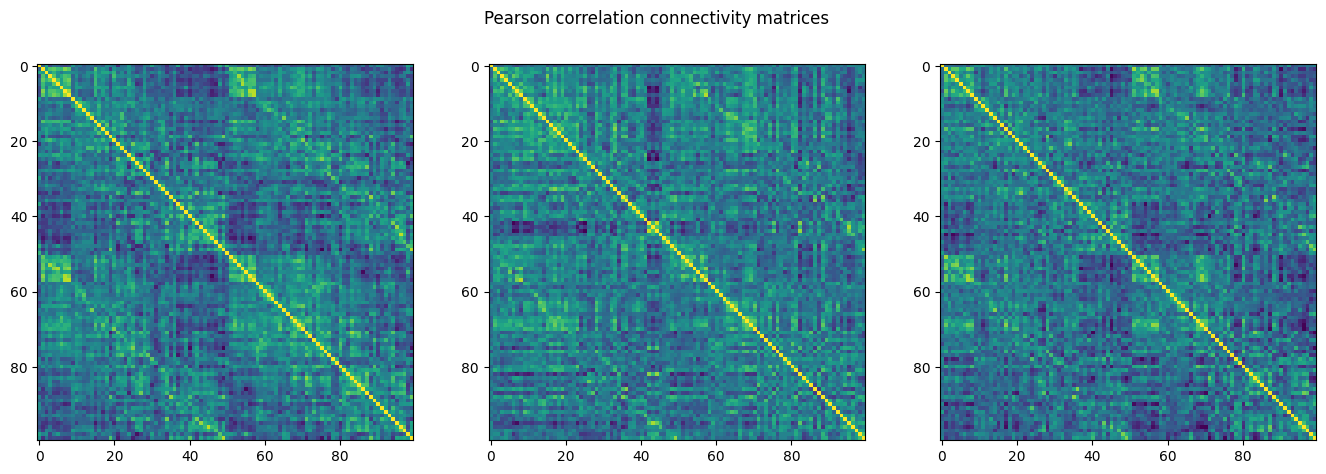

In [4]:
# Plot correlation matrices
plot_corr_matrices(matrices=pearson,
                   title="Pearson")

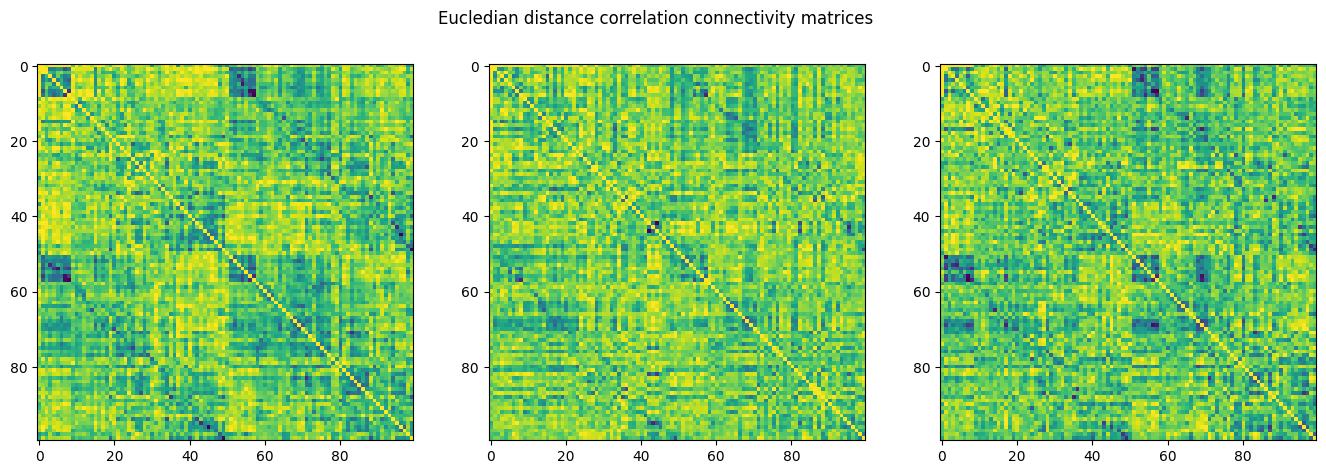

In [5]:
# Plot correlation matrices
plot_corr_matrices(matrices=euclidean_distance,
                   title="Eucledian distance")

### 2. Apply thresholding

In [6]:
from src.utils import matrix_thresholding

pearson_thr = matrix_thresholding(matrices=pearson,
                                  threshold=0.5)

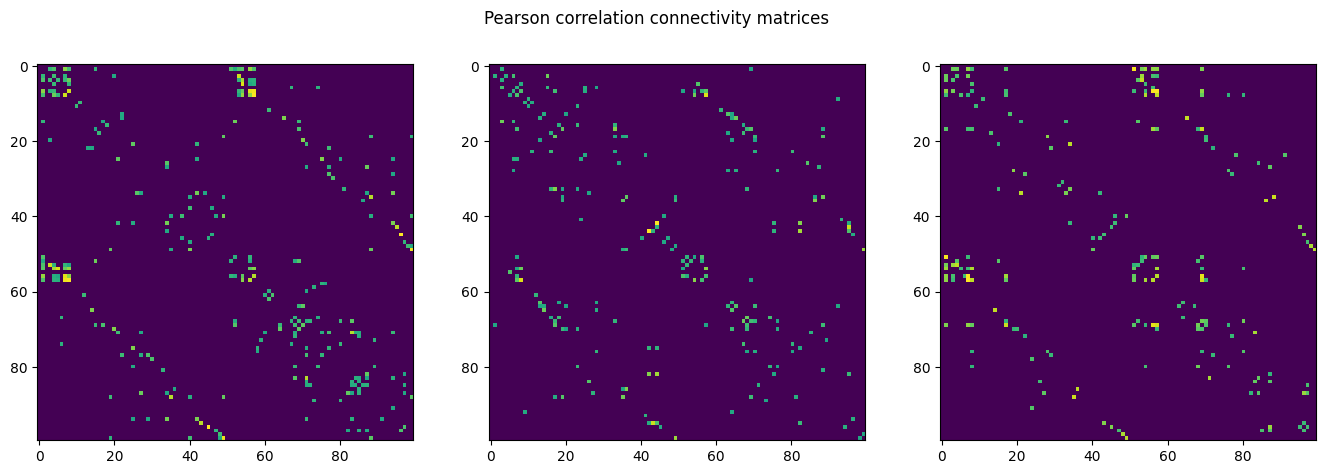

In [7]:
# Plot correlation matrices
plot_corr_matrices(matrices=pearson_thr,
                   title="Pearson")

In [8]:
pearson_thr.shape

(55, 100, 100)

### 3. Visualize graph

In [9]:
from nilearn import datasets
from nilearn import plotting as nplot
import matplotlib.pyplot as plt 

atlas_schaefer = datasets.fetch_atlas_schaefer_2018(n_rois=100,
                                                   yeo_networks=7)

atlas_schaefer.keys()

dict_keys(['maps', 'labels', 'description'])

In [10]:
# ROIs coordinates
coordinates = nplot.find_parcellation_cut_coords(labels_img=atlas_schaefer["maps"])
coordinates.shape

(100, 3)

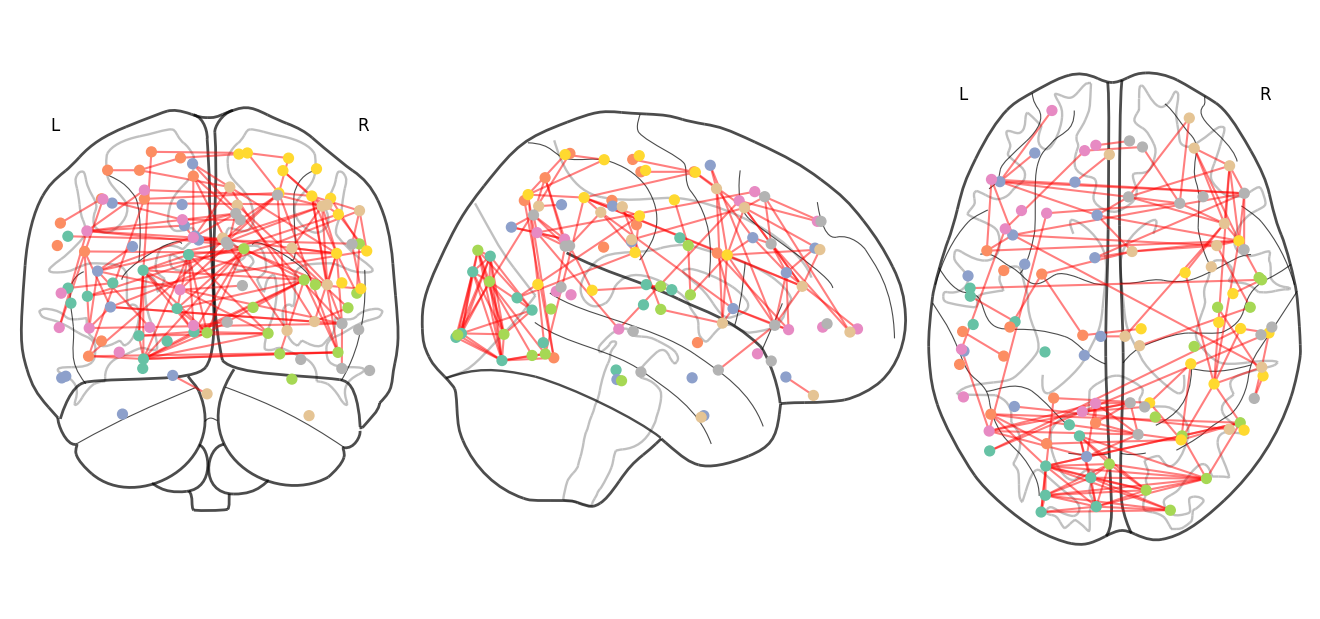

In [11]:
# nilearn graph drawing
fig = plt.figure(figsize=(13,6))
edge_options = {"color": "r", "linewidth": 1.5, "alpha": 0.5}
nplot.plot_connectome(pearson_thr[0], coordinates, figure=fig, edge_kwargs=edge_options)

# Graph Analysis

In [12]:
from src.graph_analysis import GraphMetrics

graph_metrics = GraphMetrics()

local_metrics, local_metrics_names = graph_metrics.calculate_local_metrics(connectivity_matrices=pearson_thr,
                                                                           atlas_labels=atlas_schaefer['labels'])

print(f'Given matrices shape: {pearson_thr.shape}')
print(f'Local metrics shape: {local_metrics.shape}')
print(f'Local metrics names shape: {local_metrics_names.shape}')

Given matrices shape: (55, 100, 100)
Local metrics shape: (55, 500)
Local metrics names shape: (55, 500)


In [13]:
global_metrics, global_metrics_names = graph_metrics.calculate_global_metrics(connectivity_matrices=pearson_thr,
                                                                              atlas_labels=atlas_schaefer['labels'])

print(f'Given matrices shape: {pearson_thr.shape}')
print(f'Global metrics shape: {global_metrics.shape}')
print(f'Global metrics names shape: {global_metrics_names.shape}')

Given matrices shape: (55, 100, 100)
Global metrics shape: (55, 9)
Global metrics names shape: (55, 9)


In [14]:
print(f'Global metrics for first participant: \n{dict(zip(global_metrics_names[0], global_metrics[0]))}')

Global metrics for first participant: 
{'assortativity': 0.3865959337851348, 'avg_clustering_coefficient': 0.2337041847041846, 'avg_shortest_path_length': 4.896579476861167, 'cost_efficiency': 7.1518619552102205, 'density': 0.028282828282828285, 'radius': 6.0, 'diameter': 12.0, 'transitivity': 0.46621621621621623, 'small_worldness': 0.06722260408157842}


In [15]:
graph_metrics.save_metrics(X=global_metrics, 
                           X_names=global_metrics_names,
                           path='Pearson_teenagers_global_metrics.h5')

In [16]:
a, b = graph_metrics.load_from_h5(path='Pearson_teenagers_global_metrics.h5')

# Check thresholds

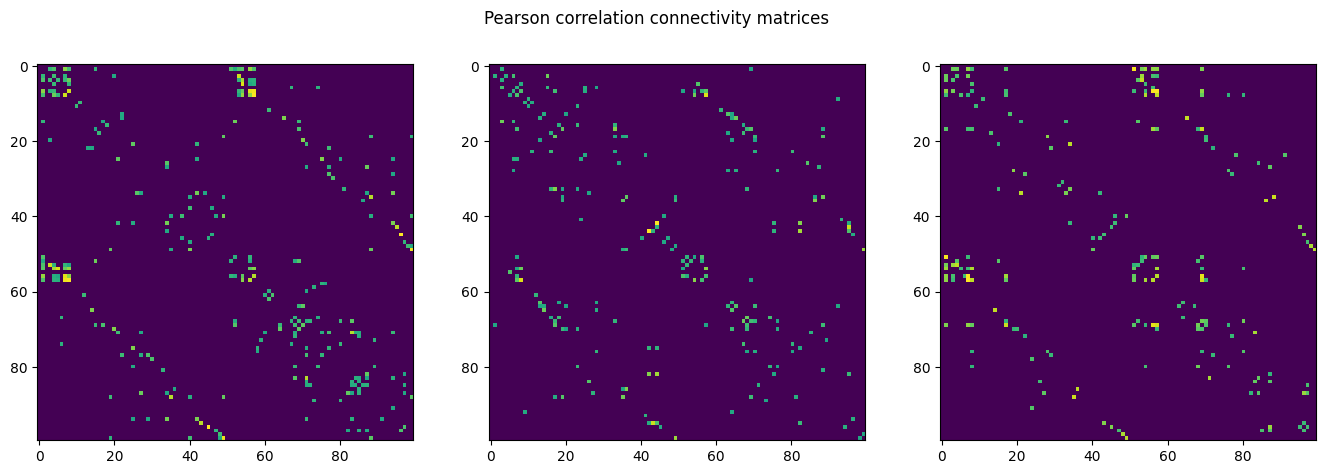

In [17]:
pearson_thr = matrix_thresholding(matrices=pearson,
                                  threshold=0.5)

# Plot correlation matrices
plot_corr_matrices(matrices=pearson_thr,
                   title="Pearson")

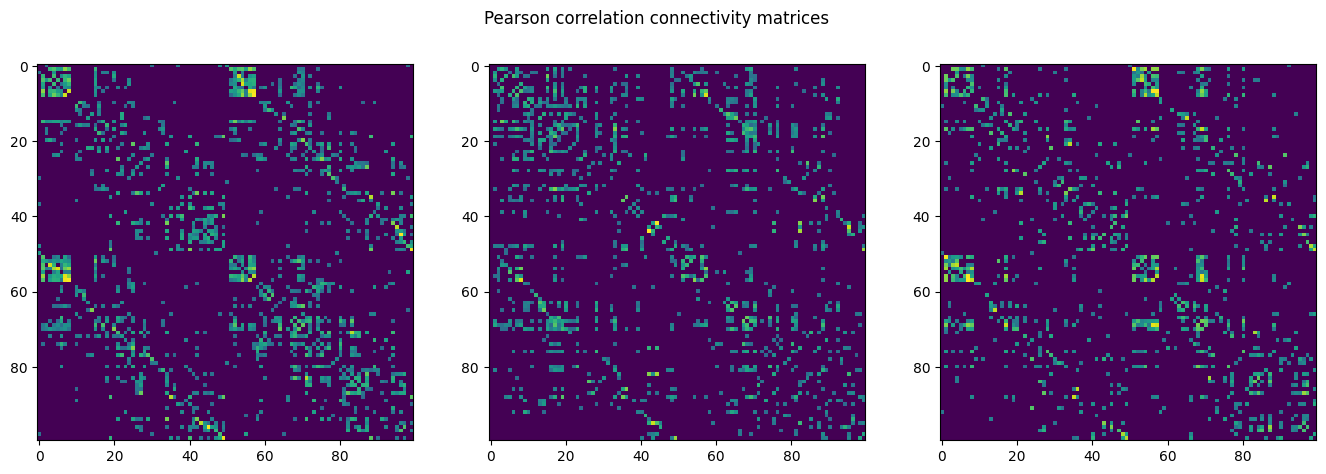

In [18]:
pearson_thr = matrix_thresholding(matrices=pearson)

# Plot correlation matrices
plot_corr_matrices(matrices=pearson_thr,
                   title="Pearson")

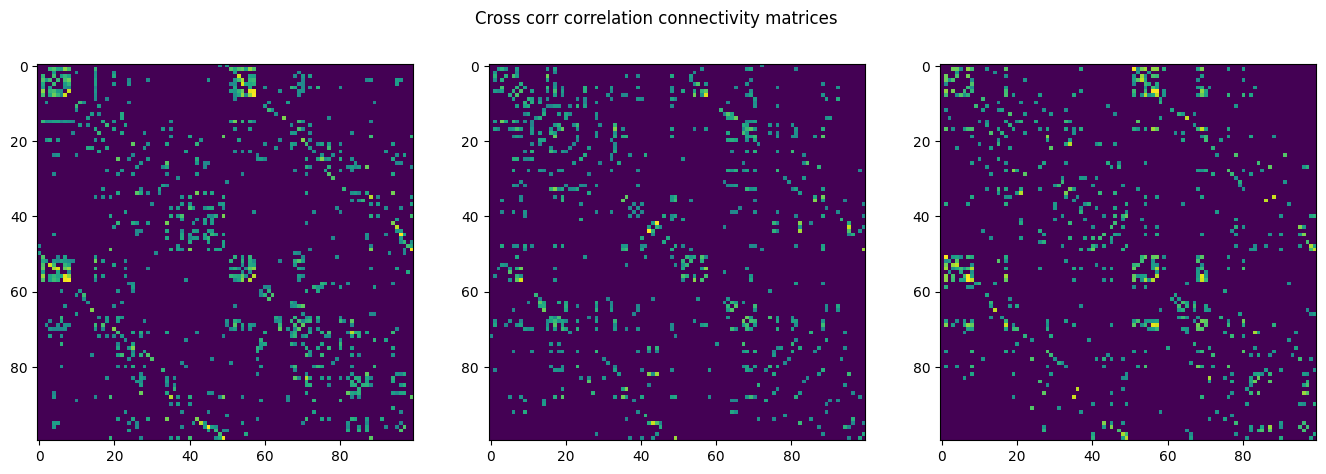

In [19]:
cross_corr_thr = matrix_thresholding(matrices=cross_correlation_statmodels)

# Plot correlation matrices
plot_corr_matrices(matrices=cross_corr_thr,
                   title="Cross corr")

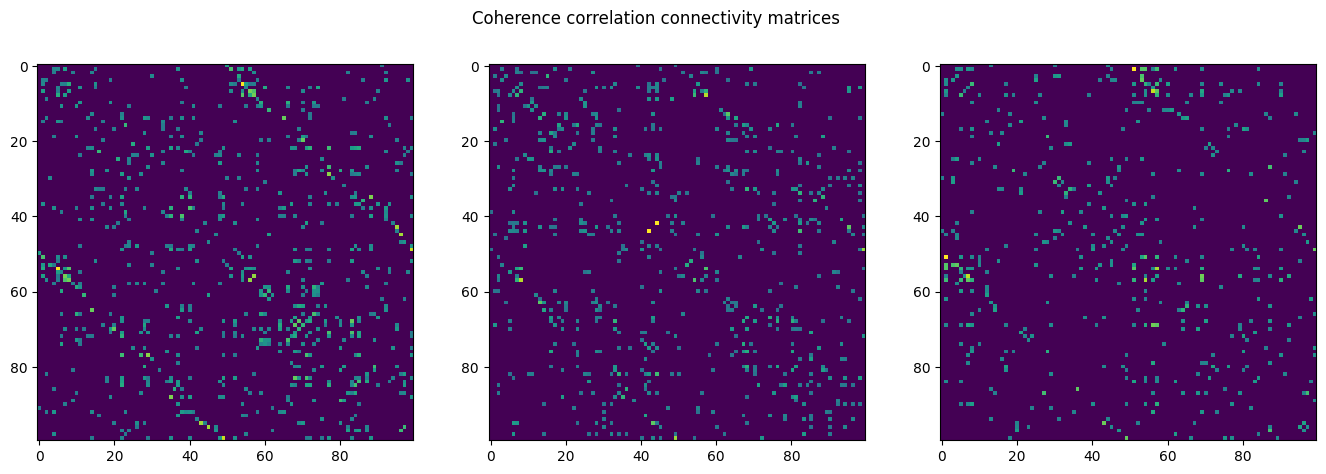

In [20]:
coherence_thr = matrix_thresholding(
    matrices=coherence
)

# Plot correlation matrices
plot_corr_matrices(
    matrices=coherence_thr,
    title="Coherence"
)

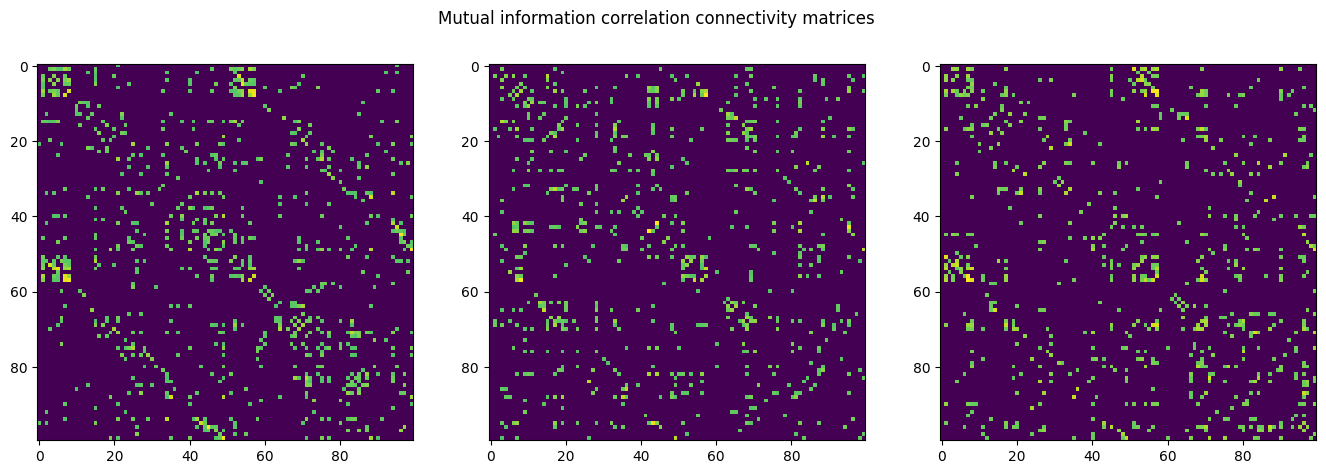

In [21]:
mutual_information_thr = matrix_thresholding(
    matrices=mutual_information
)

# Plot correlation matrices
plot_corr_matrices(
    matrices=mutual_information_thr,
    title="Mutual information"
)

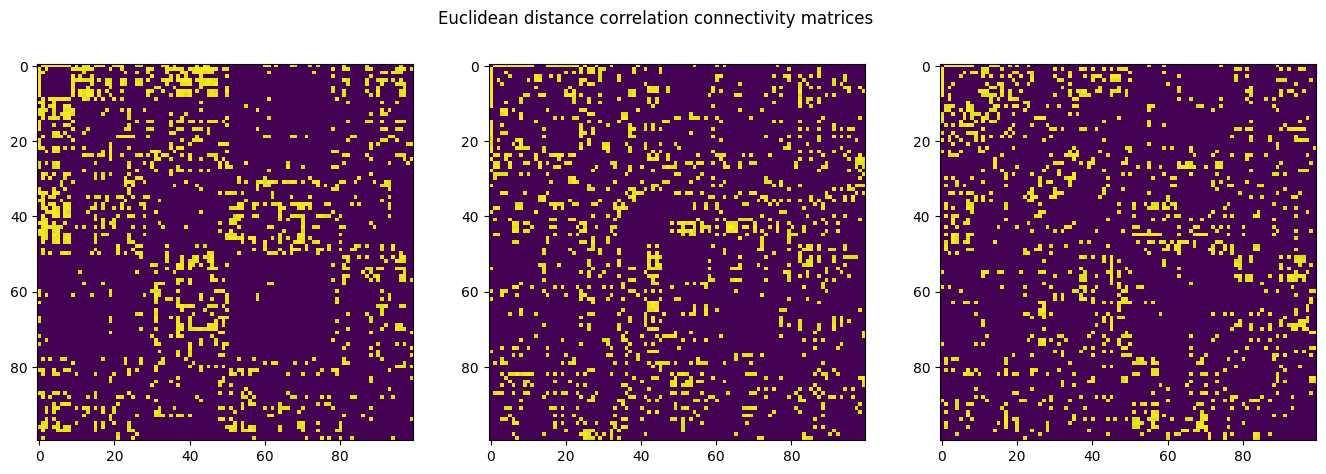

In [22]:
euclidean_distance_thr = matrix_thresholding(
    matrices=euclidean_distance
)

# Plot correlation matrices
plot_corr_matrices(
    matrices=euclidean_distance_thr,
    title="Euclidean distance"
)

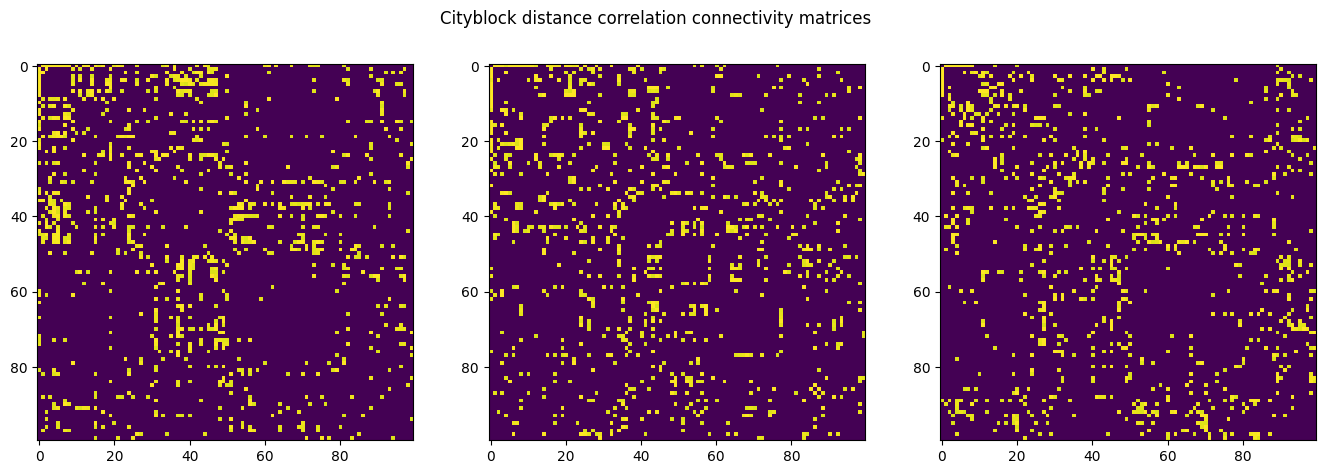

In [23]:
cityblock_distance_thr = matrix_thresholding(
    matrices=cityblock_distance
)

# Plot correlation matrices
plot_corr_matrices(
    matrices=cityblock_distance_thr,
    title="Cityblock distance"
)

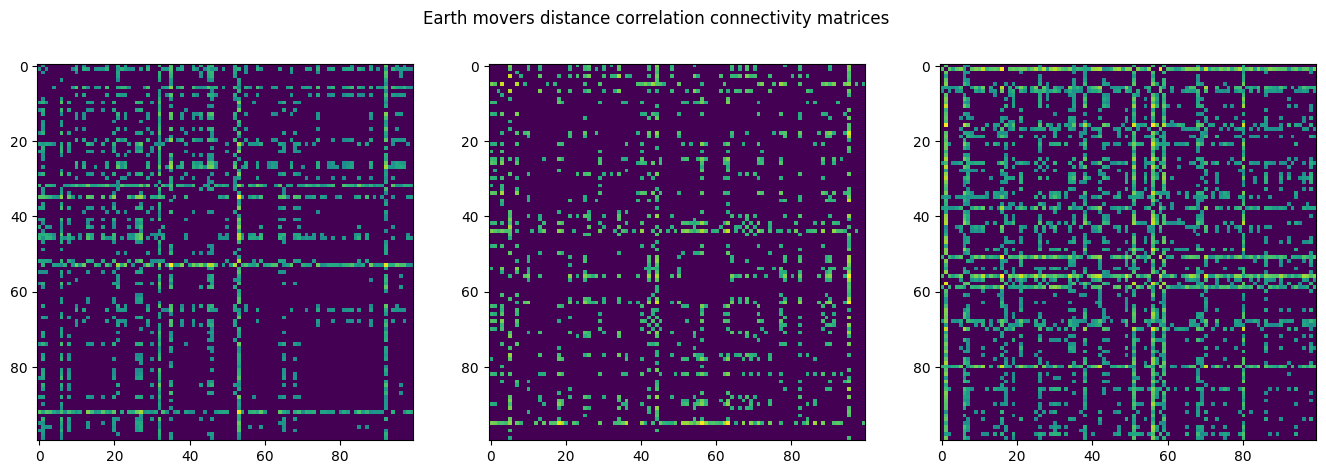

In [24]:
earth_movers_distance_thr = matrix_thresholding(
    matrices=earth_movers_distance
)

# Plot correlation matrices
plot_corr_matrices(
    matrices=earth_movers_distance_thr,
    title="Earth movers distance"
)

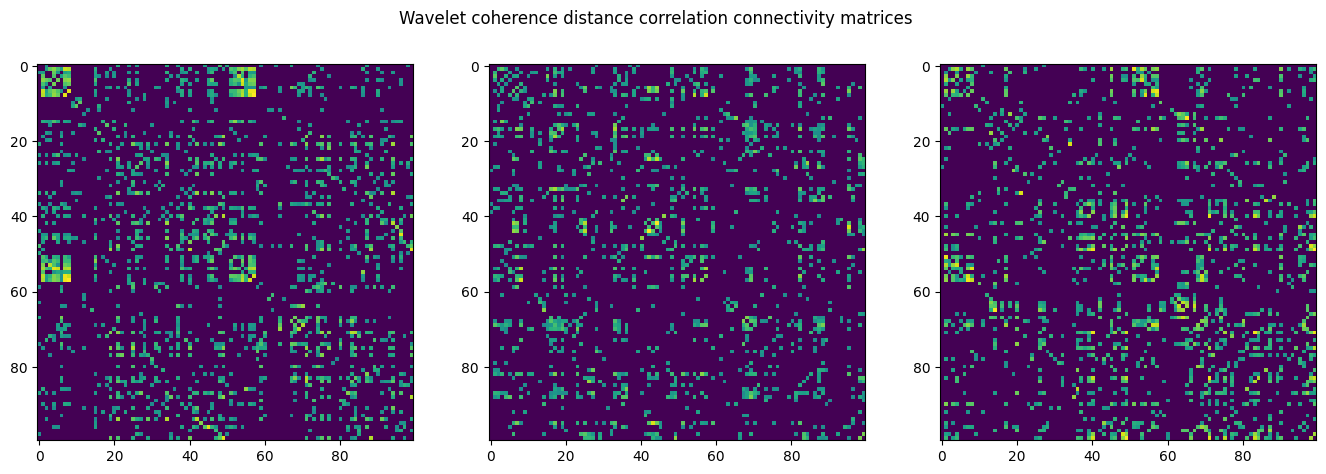

In [25]:
wavelet_coherence_thr = matrix_thresholding(
    matrices=wavelet_coherence
)

# Plot correlation matrices
plot_corr_matrices(
    matrices=wavelet_coherence_thr,
    title="Wavelet coherence distance"
)

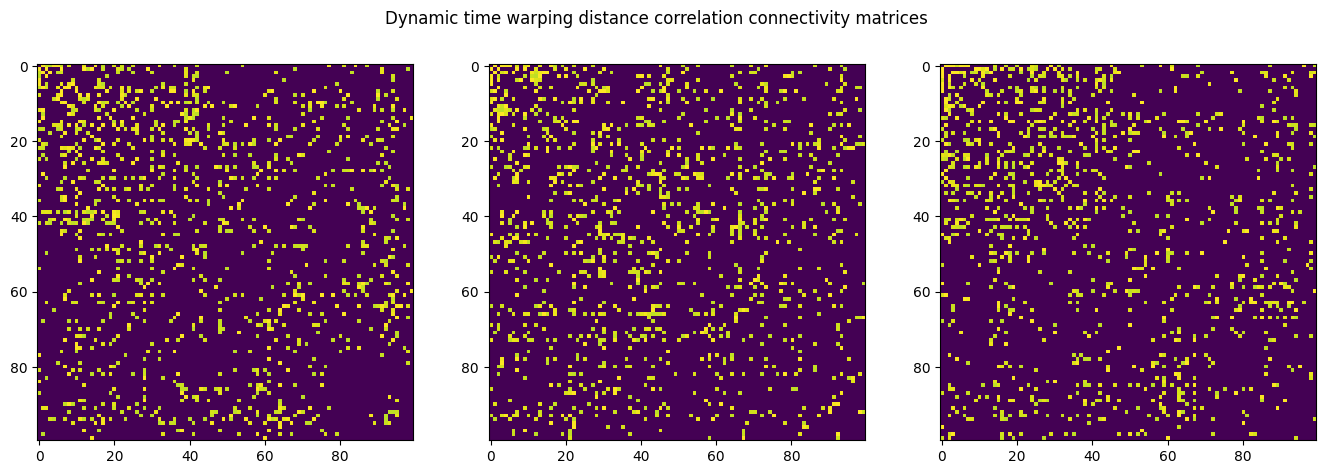

In [26]:
dynamic_time_warping_thr = matrix_thresholding(
    matrices=dynamic_time_warping
)

# Plot correlation matrices
plot_corr_matrices(
    matrices=dynamic_time_warping_thr,
    title="Dynamic time warping distance"
)

In [73]:
import networkx as nx
import numpy as np

G = nx.from_numpy_array(dynamic_time_warping_thr[0])

centrality_betweenness = np.array(list(nx.betweenness_centrality(G).values()))

In [74]:
dynamic_time_warping_thr[0]

array([[0.        , 1.        , 0.92066951, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.90199469,
        0.        ],
       [0.92066951, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.90199469, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [76]:
centrality_betweenness

array([0.03121131, 0.01253522, 0.00894538, 0.00144458, 0.00151725,
       0.00445093, 0.01744325, 0.02191881, 0.01849421, 0.0089711 ,
       0.03582688, 0.03564636, 0.01884205, 0.00603602, 0.020601  ,
       0.01198032, 0.03032072, 0.02643704, 0.00442227, 0.01210847,
       0.03588287, 0.02481648, 0.00778758, 0.00516555, 0.01001976,
       0.00490903, 0.01119172, 0.01363413, 0.03081235, 0.00116234,
       0.02556006, 0.00162943, 0.01401594, 0.02517634, 0.00039662,
       0.00150361, 0.02426146, 0.00885243, 0.00777958, 0.02046937,
       0.00180225, 0.03340319, 0.02290405, 0.00528183, 0.00893359,
       0.00295508, 0.0002906 , 0.00112304, 0.03824328, 0.00471397,
       0.00543917, 0.00314103, 0.00591247, 0.00372231, 0.00161179,
       0.00089974, 0.00358388, 0.00559102, 0.02028807, 0.00361396,
       0.00878069, 0.04226344, 0.0026959 , 0.01146692, 0.03154995,
       0.00599959, 0.00704263, 0.00513249, 0.01817736, 0.00901721,
       0.00927251, 0.00178825, 0.01186794, 0.01012769, 0.00467

In [77]:
G = nx.from_numpy_array(dynamic_time_warping[0])

centrality_betweenness = np.array(list(nx.betweenness_centrality(G).values()))